In [2]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [3]:
from fastbook import *
from fastai.vision.widgets import *

In [93]:
import shutil
shutil.rmtree('/content/gdrive/MyDrive/Fastai/lab2/girls')

In [94]:
path = Path('/content/gdrive/MyDrive/Fastai/lab2/girls')
girl_types = 'european','asian', 'african'

if not path.exists():
    path.mkdir()
    for o in girl_types:  
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o} girls face ',50)
        download_images(dest, urls=results)

In [95]:
# dest = '/content/gdrive/MyDrive/Fastai/lab2/girls/afican girls face'
# results = search_images_ddg('african girls face',200)
# download_images(dest, urls=results)

In [96]:
fns = get_image_files(path)
print(len(fns))
failed = verify_images(fns)
print(len(failed))
failed.map(Path.unlink);

142
1


In [97]:
girls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)

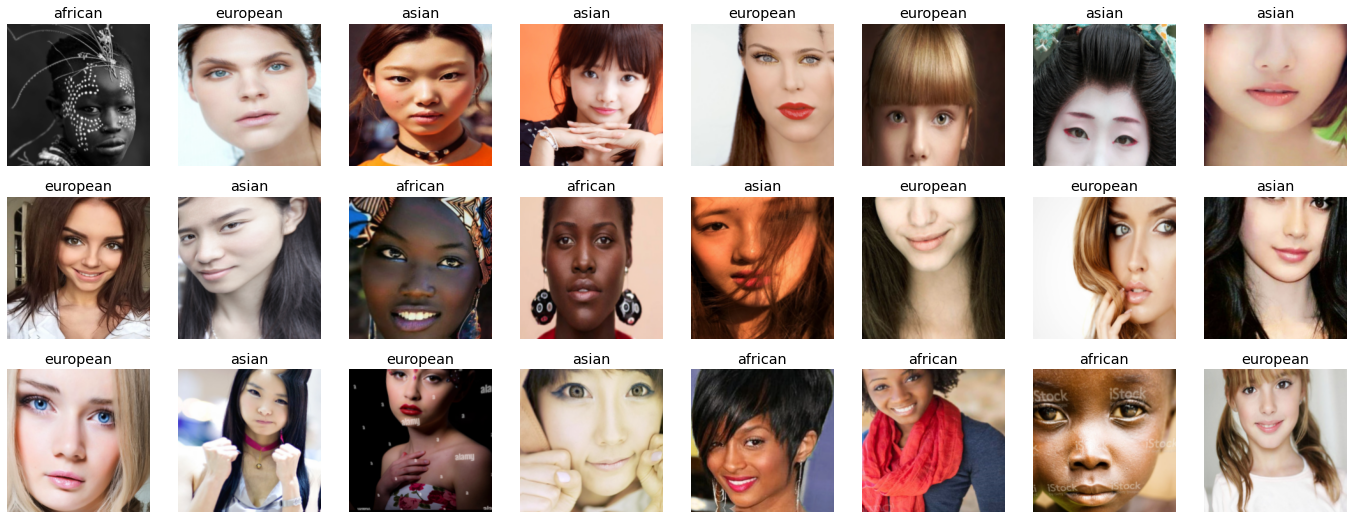

In [110]:
# girls = girls.new(
#     item_tfms=RandomResizedCrop(224, min_scale=0.5),
#     batch_tfms=aug_transforms())
dls = girls.dataloaders(path)
dls.train.show_batch(max_n=24, nrows=3)

In [115]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.337049,0.694139,0.214286,00:08


epoch,train_loss,valid_loss,error_rate,time
0,0.437947,0.697673,0.250000,00:07
1,0.461058,0.744578,0.250000,00:07
2,0.402673,0.795667,0.250000,00:07
3,0.373808,0.844962,0.214286,00:09
4,0.367923,0.875088,0.214286,00:07


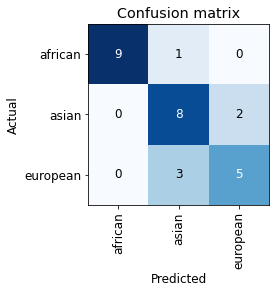

In [117]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

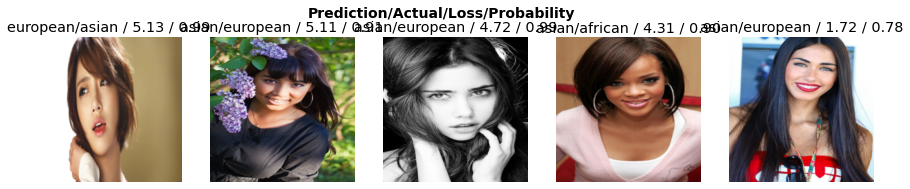

In [118]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [106]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [120]:
learn.export()
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [129]:
learn_inf = load_learner('/content/gdrive/MyDrive/Fastai/lab2/export.pkl')

In [123]:
btn_upload = widgets.FileUpload()
out_pl = widgets.Output()
out_pl.clear_output()
lbl_pred = widgets.Label()
# pred,pred_idx,probs = learn_inf.predict(img)

In [124]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [125]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [126]:
btn_upload = widgets.FileUpload()

In [130]:
#hide_output
VBox([widgets.Label('upload girl''s face!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [ ]:
#hide
!pip install voila
!jupyter serverextension enable --sys-prefix voila 